In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("ds_salaries.csv")

In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [17]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [18]:
df["work_year"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [19]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
df.duplicated().sum()

1171

In [21]:
df = df.drop_duplicates()

In [23]:
df.groupby("employment_type")["salary"].mean().sort_values(ascending=False)

employment_type
FL    288755.500000
FT    211309.339223
CT    113300.000000
PT     79910.823529
Name: salary, dtype: float64

In [24]:
job_title_counts = df["job_title"].value_counts()

In [25]:
job_title_counts.sort_values(inplace=True, ascending=False)

In [28]:
job_title_counts.head(10)

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64

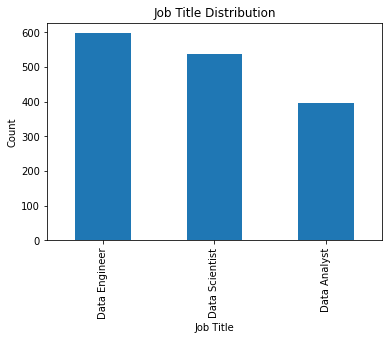

In [32]:
job_title_counts.head(3).plot(kind="bar")
plt.title("Job Title Distribution")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

In [33]:
average_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean()
average_salary_by_year.sort_values(ascending=False)

work_year
2023    146998.227509
2022    130176.709333
2021     93637.385965
2020     93353.426667
Name: salary_in_usd, dtype: float64

In [36]:
df.groupby("employee_residence")["salary"].median().sort_values(ascending=False)

employee_residence
CL    15252500.0
HU    11000000.0
IL     1500000.0
IN     1342500.0
TH      840000.0
         ...    
MD       18000.0
ID       15000.0
SK       12000.0
MA       10000.0
MK        6000.0
Name: salary, Length: 78, dtype: float64

In [38]:
df.groupby("company_location")["remote_ratio"].mean()

company_location
AE     66.666667
AL     50.000000
AM      0.000000
AR    100.000000
AS     66.666667
         ...    
TH     66.666667
TR     40.000000
UA     37.500000
US     48.548471
VN      0.000000
Name: remote_ratio, Length: 72, dtype: float64

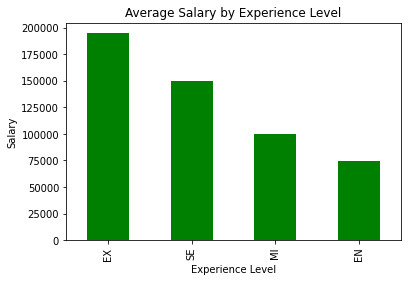

In [43]:
average_salary_by_experience = df.groupby("experience_level")["salary"].median().sort_values(ascending=False)
average_salary_by_experience.plot(kind="bar", color="green")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.show()

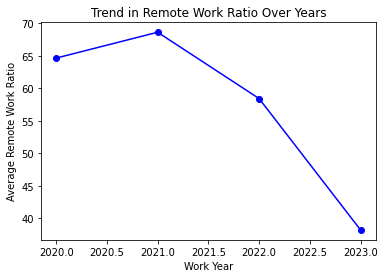

In [49]:
df.groupby("work_year")["remote_ratio"].mean().plot(kind="line", marker = "o", color = "blue")
plt.title("Trend in Remote Work Ratio Over Years")
plt.xlabel("Work Year")
plt.ylabel("Average Remote Work Ratio")
plt.show()

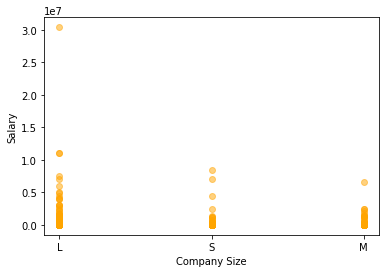

In [50]:
plt.scatter(df["company_size"], df["salary"], alpha = 0.5, color = "orange")
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.show()

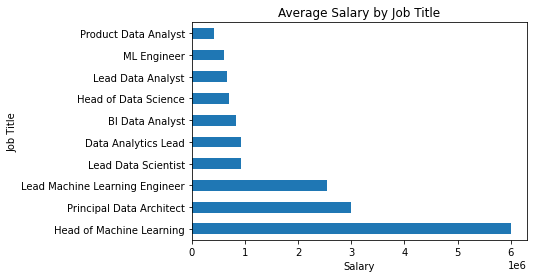

In [53]:
df.groupby("job_title")["salary"].mean().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Average Salary by Job Title")
plt.xlabel("Salary")
plt.ylabel("Job Title")
plt.show()